# Image Multimodal Search

This notebooks shows how to carry out an image multimodal search with the [LAVIS](https://github.com/salesforce/LAVIS) library. 

The first cell is only run on google colab and installs the [ammico](https://github.com/ssciwr/AMMICO) package.

After that, we can import `ammico` and read in the files given a folder path.

In [1]:
# if running on google colab
# flake8-noqa-cell
import os

if "google.colab" in str(get_ipython()):
    # update python version
    # install setuptools
    # %pip install setuptools==61 -qqq
    # install ammico
    %pip install git+https://github.com/ssciwr/ammico.git -qqq
    # mount google drive for data and API key
    from google.colab import drive

    drive.mount("/content/drive")

In [2]:
import ammico.utils as mutils
import ammico.multimodal_search as ms

In [3]:
images = mutils.find_files(
    path="data/",
    limit=10,
)

In [4]:
images

['data/102730_eng.png', 'data/102141_2_eng.png', 'data/106349S_por.png']

In [5]:
mydict = mutils.initialize_dict(images)

In [6]:
mydict

{'102730_eng': {'filename': 'data/102730_eng.png'},
 '102141_2_eng': {'filename': 'data/102141_2_eng.png'},
 '106349S_por': {'filename': 'data/106349S_por.png'}}

## Indexing and extracting features from images in selected folder

First you need to select a model. You can choose one of the following models: 
- [blip](https://github.com/salesforce/BLIP)
- [blip2](https://huggingface.co/docs/transformers/main/model_doc/blip-2) 
- [albef](https://github.com/salesforce/ALBEF) 
- [clip_base](https://github.com/openai/CLIP/blob/main/model-card.md)
- [clip_vitl14](https://github.com/mlfoundations/open_clip) 
- [clip_vitl14_336](https://github.com/mlfoundations/open_clip)

In [7]:
model_type = "blip"
# model_type = "blip2"
# model_type = "albef"
# model_type = "clip_base"
# model_type = "clip_vitl14"
# model_type = "clip_vitl14_336"

To process the loaded images using the selected model, use the below code:

In [8]:
my_obj = ms.MultimodalSearch(mydict)

In [9]:
my_obj.subdict

{'102730_eng': {'filename': 'data/102730_eng.png'},
 '102141_2_eng': {'filename': 'data/102141_2_eng.png'},
 '106349S_por': {'filename': 'data/106349S_por.png'}}

In [10]:
(
    model,
    vis_processors,
    txt_processors,
    image_keys,
    image_names,
    features_image_stacked,
) = my_obj.parsing_images(
    model_type, 
    path_to_save_tensors="data/",
    )

  0%|          | 0.00/1.97G [00:00<?, ?B/s]

  0%|          | 4.21M/1.97G [00:00<00:48, 43.7MB/s]

  0%|          | 8.88M/1.97G [00:00<00:45, 46.8MB/s]

  1%|          | 16.5M/1.97G [00:00<00:34, 61.5MB/s]

  1%|          | 23.9M/1.97G [00:00<00:30, 67.9MB/s]

  2%|▏         | 32.0M/1.97G [00:00<00:31, 66.2MB/s]

  2%|▏         | 38.5M/1.97G [00:00<00:31, 66.9MB/s]

  2%|▏         | 44.9M/1.97G [00:00<00:33, 61.5MB/s]

  3%|▎         | 51.0M/1.97G [00:00<00:33, 62.1MB/s]

  3%|▎         | 57.0M/1.97G [00:00<00:33, 61.6MB/s]

  3%|▎         | 64.0M/1.97G [00:01<00:38, 53.1MB/s]

  4%|▎         | 70.9M/1.97G [00:01<00:35, 58.1MB/s]

  4%|▍         | 76.7M/1.97G [00:01<00:37, 54.0MB/s]

  4%|▍         | 82.1M/1.97G [00:01<00:37, 54.2MB/s]

  4%|▍         | 89.4M/1.97G [00:01<00:33, 60.1MB/s]

  5%|▍         | 96.5M/1.97G [00:01<00:31, 63.8MB/s]

  5%|▌         | 104M/1.97G [00:01<00:29, 68.7MB/s] 

  6%|▌         | 112M/1.97G [00:01<00:27, 73.0MB/s]

  6%|▌         | 120M/1.97G [00:01<00:26, 75.4MB/s]

  6%|▋         | 127M/1.97G [00:02<00:26, 74.7MB/s]

  7%|▋         | 134M/1.97G [00:02<00:26, 74.5MB/s]

  7%|▋         | 142M/1.97G [00:02<00:27, 70.4MB/s]

  7%|▋         | 148M/1.97G [00:02<00:28, 68.2MB/s]

  8%|▊         | 156M/1.97G [00:02<00:27, 70.5MB/s]

  8%|▊         | 162M/1.97G [00:02<00:29, 66.1MB/s]

  8%|▊         | 169M/1.97G [00:02<00:31, 61.1MB/s]

  9%|▊         | 176M/1.97G [00:02<00:31, 60.9MB/s]

  9%|▉         | 184M/1.97G [00:03<00:31, 60.3MB/s]

 10%|▉         | 192M/1.97G [00:03<00:35, 54.4MB/s]

 10%|▉         | 200M/1.97G [00:03<00:34, 54.5MB/s]

 10%|█         | 208M/1.97G [00:03<00:37, 51.2MB/s]

 11%|█         | 215M/1.97G [00:03<00:33, 55.9MB/s]

 11%|█         | 221M/1.97G [00:03<00:34, 55.1MB/s]

 11%|█         | 226M/1.97G [00:03<00:34, 55.0MB/s]

 11%|█▏        | 232M/1.97G [00:03<00:33, 55.9MB/s]

 12%|█▏        | 239M/1.97G [00:04<00:30, 61.0MB/s]

 12%|█▏        | 245M/1.97G [00:04<00:30, 60.4MB/s]

 12%|█▏        | 251M/1.97G [00:04<00:32, 57.8MB/s]

 13%|█▎        | 259M/1.97G [00:04<00:28, 64.9MB/s]

 13%|█▎        | 265M/1.97G [00:04<00:30, 61.0MB/s]

 14%|█▎        | 273M/1.97G [00:04<00:27, 65.5MB/s]

 14%|█▍        | 280M/1.97G [00:04<00:26, 69.6MB/s]

 14%|█▍        | 288M/1.97G [00:04<00:24, 72.8MB/s]

 15%|█▍        | 296M/1.97G [00:04<00:24, 74.3MB/s]

 15%|█▌        | 303M/1.97G [00:05<00:23, 75.5MB/s]

 15%|█▌        | 310M/1.97G [00:05<00:25, 71.0MB/s]

 16%|█▌        | 318M/1.97G [00:05<00:24, 73.3MB/s]

 16%|█▌        | 325M/1.97G [00:05<00:26, 67.6MB/s]

 16%|█▋        | 332M/1.97G [00:05<00:27, 65.3MB/s]

 17%|█▋        | 339M/1.97G [00:05<00:25, 68.6MB/s]

 17%|█▋        | 347M/1.97G [00:05<00:24, 72.7MB/s]

 18%|█▊        | 354M/1.97G [00:06<00:54, 32.3MB/s]

 18%|█▊        | 360M/1.97G [00:06<00:59, 29.1MB/s]

 18%|█▊        | 367M/1.97G [00:06<00:48, 36.0MB/s]

 18%|█▊        | 373M/1.97G [00:07<01:14, 23.2MB/s]

 19%|█▊        | 377M/1.97G [00:07<01:09, 24.6MB/s]

 19%|█▉        | 384M/1.97G [00:07<00:54, 31.6MB/s]

 19%|█▉        | 392M/1.97G [00:07<00:42, 39.9MB/s]

 20%|█▉        | 397M/1.97G [00:07<00:41, 41.3MB/s]

 20%|█▉        | 402M/1.97G [00:07<00:39, 43.4MB/s]

 20%|██        | 408M/1.97G [00:07<00:36, 46.8MB/s]

 21%|██        | 416M/1.97G [00:07<00:32, 51.1MB/s]

 21%|██        | 424M/1.97G [00:08<00:28, 57.9MB/s]

 21%|██▏       | 430M/1.97G [00:08<00:29, 55.7MB/s]

 22%|██▏       | 435M/1.97G [00:08<00:29, 56.2MB/s]

 22%|██▏       | 441M/1.97G [00:08<00:30, 54.7MB/s]

 22%|██▏       | 449M/1.97G [00:08<00:26, 62.3MB/s]

 23%|██▎       | 457M/1.97G [00:08<00:24, 67.5MB/s]

 23%|██▎       | 464M/1.97G [00:08<00:23, 70.5MB/s]

 23%|██▎       | 472M/1.97G [00:08<00:22, 73.6MB/s]

 24%|██▍       | 479M/1.97G [00:08<00:21, 75.2MB/s]

 24%|██▍       | 487M/1.97G [00:09<00:21, 73.5MB/s]

 25%|██▍       | 495M/1.97G [00:09<00:20, 77.9MB/s]

 25%|██▍       | 503M/1.97G [00:09<00:20, 76.8MB/s]

 25%|██▌       | 510M/1.97G [00:09<00:20, 75.5MB/s]

 26%|██▌       | 517M/1.97G [00:09<00:22, 70.5MB/s]

 26%|██▌       | 524M/1.97G [00:09<00:26, 59.8MB/s]

 26%|██▋       | 530M/1.97G [00:09<00:28, 53.8MB/s]

 27%|██▋       | 536M/1.97G [00:09<00:27, 56.1MB/s]

 27%|██▋       | 544M/1.97G [00:09<00:24, 62.7MB/s]

 27%|██▋       | 552M/1.97G [00:10<00:22, 67.6MB/s]

 28%|██▊       | 558M/1.97G [00:10<00:22, 66.7MB/s]

 28%|██▊       | 566M/1.97G [00:10<00:21, 69.5MB/s]

 28%|██▊       | 573M/1.97G [00:10<00:20, 72.4MB/s]

 29%|██▉       | 580M/1.97G [00:10<00:24, 62.8MB/s]

 29%|██▉       | 587M/1.97G [00:10<00:24, 60.2MB/s]

 29%|██▉       | 593M/1.97G [00:10<00:33, 45.0MB/s]

 30%|██▉       | 600M/1.97G [00:11<01:18, 19.0MB/s]

 30%|███       | 614M/1.97G [00:11<00:45, 32.1MB/s]

 31%|███       | 621M/1.97G [00:12<00:42, 34.7MB/s]

 31%|███       | 627M/1.97G [00:12<00:41, 34.8MB/s]

 31%|███▏      | 632M/1.97G [00:12<00:48, 30.0MB/s]

 32%|███▏      | 640M/1.97G [00:12<00:38, 37.1MB/s]

 32%|███▏      | 648M/1.97G [00:12<00:32, 44.6MB/s]

 32%|███▏      | 654M/1.97G [00:12<00:35, 40.8MB/s]

 33%|███▎      | 662M/1.97G [00:12<00:28, 50.2MB/s]

 33%|███▎      | 668M/1.97G [00:13<00:26, 53.1MB/s]

 33%|███▎      | 674M/1.97G [00:13<00:26, 52.9MB/s]

 34%|███▎      | 680M/1.97G [00:13<00:25, 55.2MB/s]

 34%|███▍      | 686M/1.97G [00:13<00:24, 57.0MB/s]

 34%|███▍      | 692M/1.97G [00:13<00:23, 58.0MB/s]

 35%|███▍      | 698M/1.97G [00:13<00:30, 45.3MB/s]

 35%|███▍      | 704M/1.97G [00:13<00:31, 44.3MB/s]

 35%|███▌      | 712M/1.97G [00:14<00:29, 46.0MB/s]

 36%|███▌      | 719M/1.97G [00:14<00:26, 51.7MB/s]

 36%|███▌      | 724M/1.97G [00:14<00:28, 47.7MB/s]

 36%|███▌      | 729M/1.97G [00:14<00:29, 46.3MB/s]

 37%|███▋      | 737M/1.97G [00:14<00:24, 54.4MB/s]

 37%|███▋      | 744M/1.97G [00:14<00:22, 59.5MB/s]

 37%|███▋      | 752M/1.97G [00:14<00:20, 65.6MB/s]

 38%|███▊      | 758M/1.97G [00:14<00:20, 65.6MB/s]

 38%|███▊      | 766M/1.97G [00:14<00:19, 68.9MB/s]

 38%|███▊      | 773M/1.97G [00:15<00:24, 53.6MB/s]

 39%|███▊      | 779M/1.97G [00:15<00:23, 56.2MB/s]

 39%|███▉      | 784M/1.97G [00:15<00:23, 56.2MB/s]

 39%|███▉      | 792M/1.97G [00:15<00:21, 61.0MB/s]

 40%|███▉      | 800M/1.97G [00:15<00:19, 64.2MB/s]

 40%|████      | 808M/1.97G [00:15<00:18, 68.1MB/s]

 40%|████      | 815M/1.97G [00:15<00:17, 70.2MB/s]

 41%|████      | 822M/1.97G [00:15<00:18, 68.0MB/s]

 41%|████      | 830M/1.97G [00:15<00:17, 72.3MB/s]

 41%|████▏     | 837M/1.97G [00:16<00:20, 59.9MB/s]

 42%|████▏     | 843M/1.97G [00:16<00:22, 55.0MB/s]

 42%|████▏     | 849M/1.97G [00:16<00:21, 56.6MB/s]

 42%|████▏     | 856M/1.97G [00:16<00:19, 62.1MB/s]

 43%|████▎     | 863M/1.97G [00:16<00:18, 64.8MB/s]

 43%|████▎     | 871M/1.97G [00:16<00:17, 69.4MB/s]

 44%|████▎     | 878M/1.97G [00:16<00:18, 63.6MB/s]

 44%|████▍     | 886M/1.97G [00:16<00:17, 69.6MB/s]

 44%|████▍     | 893M/1.97G [00:17<00:21, 55.8MB/s]

 45%|████▍     | 899M/1.97G [00:17<00:21, 53.9MB/s]

 45%|████▍     | 904M/1.97G [00:17<00:21, 54.3MB/s]

 45%|████▌     | 912M/1.97G [00:17<00:20, 56.0MB/s]

 46%|████▌     | 920M/1.97G [00:17<00:18, 62.3MB/s]

 46%|████▌     | 926M/1.97G [00:17<00:19, 57.9MB/s]

 46%|████▌     | 932M/1.97G [00:17<00:20, 55.6MB/s]

 47%|████▋     | 939M/1.97G [00:17<00:18, 60.9MB/s]

 47%|████▋     | 945M/1.97G [00:18<00:18, 59.5MB/s]

 47%|████▋     | 952M/1.97G [00:18<00:17, 64.4MB/s]

 48%|████▊     | 960M/1.97G [00:18<00:16, 69.2MB/s]

 48%|████▊     | 968M/1.97G [00:18<00:15, 71.2MB/s]

 48%|████▊     | 975M/1.97G [00:18<00:15, 70.4MB/s]

 49%|████▊     | 981M/1.97G [00:18<00:19, 56.1MB/s]

 49%|████▉     | 987M/1.97G [00:18<00:21, 51.4MB/s]

 49%|████▉     | 992M/1.97G [00:18<00:20, 51.7MB/s]

 50%|████▉     | 0.98G/1.97G [00:19<00:18, 58.3MB/s]

 50%|████▉     | 0.98G/1.97G [00:19<00:16, 62.8MB/s]

 50%|█████     | 0.99G/1.97G [00:19<00:16, 63.8MB/s]

 51%|█████     | 1.00G/1.97G [00:19<00:16, 64.4MB/s]

 51%|█████     | 1.00G/1.97G [00:19<00:20, 51.0MB/s]

 51%|█████     | 1.01G/1.97G [00:19<00:23, 44.5MB/s]

 51%|█████▏    | 1.01G/1.97G [00:19<00:20, 50.4MB/s]

 52%|█████▏    | 1.02G/1.97G [00:19<00:23, 42.8MB/s]

 52%|█████▏    | 1.02G/1.97G [00:20<00:23, 43.6MB/s]

 52%|█████▏    | 1.03G/1.97G [00:20<00:19, 52.2MB/s]

 53%|█████▎    | 1.04G/1.97G [00:20<00:16, 58.8MB/s]

 53%|█████▎    | 1.05G/1.97G [00:20<00:16, 60.4MB/s]

 53%|█████▎    | 1.05G/1.97G [00:20<00:15, 65.5MB/s]

 54%|█████▍    | 1.06G/1.97G [00:20<00:13, 70.7MB/s]

 54%|█████▍    | 1.07G/1.97G [00:20<00:13, 71.2MB/s]

 55%|█████▍    | 1.07G/1.97G [00:20<00:12, 74.6MB/s]

 55%|█████▍    | 1.08G/1.97G [00:20<00:13, 72.4MB/s]

 55%|█████▌    | 1.09G/1.97G [00:21<00:12, 75.0MB/s]

 56%|█████▌    | 1.10G/1.97G [00:21<00:12, 76.1MB/s]

 56%|█████▌    | 1.10G/1.97G [00:21<00:12, 76.0MB/s]

 56%|█████▋    | 1.11G/1.97G [00:21<00:11, 78.8MB/s]

 57%|█████▋    | 1.12G/1.97G [00:21<00:12, 75.9MB/s]

 57%|█████▋    | 1.13G/1.97G [00:21<00:13, 69.5MB/s]

 58%|█████▊    | 1.13G/1.97G [00:21<00:13, 66.6MB/s]

 58%|█████▊    | 1.14G/1.97G [00:21<00:13, 66.6MB/s]

 58%|█████▊    | 1.15G/1.97G [00:21<00:13, 66.6MB/s]

 58%|█████▊    | 1.15G/1.97G [00:22<00:14, 60.3MB/s]

 59%|█████▊    | 1.16G/1.97G [00:22<00:14, 60.2MB/s]

 59%|█████▉    | 1.16G/1.97G [00:22<00:14, 61.2MB/s]

 59%|█████▉    | 1.17G/1.97G [00:22<00:14, 60.7MB/s]

 60%|█████▉    | 1.18G/1.97G [00:22<00:14, 60.2MB/s]

 60%|█████▉    | 1.18G/1.97G [00:22<00:16, 50.7MB/s]

 60%|██████    | 1.19G/1.97G [00:22<00:13, 63.5MB/s]

 61%|██████    | 1.20G/1.97G [00:22<00:11, 69.1MB/s]

 61%|██████    | 1.21G/1.97G [00:22<00:11, 72.0MB/s]

 62%|██████▏   | 1.21G/1.97G [00:22<00:10, 74.8MB/s]

 62%|██████▏   | 1.22G/1.97G [00:23<00:13, 59.8MB/s]

 62%|██████▏   | 1.23G/1.97G [00:23<00:16, 48.0MB/s]

 63%|██████▎   | 1.23G/1.97G [00:23<00:15, 50.3MB/s]

 63%|██████▎   | 1.24G/1.97G [00:23<00:15, 50.9MB/s]

 63%|██████▎   | 1.25G/1.97G [00:23<00:17, 44.3MB/s]

 64%|██████▍   | 1.26G/1.97G [00:24<00:12, 58.9MB/s]

 64%|██████▍   | 1.27G/1.97G [00:24<00:12, 62.6MB/s]

 65%|██████▍   | 1.28G/1.97G [00:24<00:14, 50.9MB/s]

 65%|██████▌   | 1.28G/1.97G [00:24<00:16, 45.9MB/s]

 65%|██████▌   | 1.29G/1.97G [00:24<00:17, 42.1MB/s]

 66%|██████▌   | 1.30G/1.97G [00:24<00:14, 49.2MB/s]

 66%|██████▌   | 1.30G/1.97G [00:25<00:17, 41.2MB/s]

 66%|██████▋   | 1.31G/1.97G [00:25<00:29, 24.1MB/s]

 67%|██████▋   | 1.32G/1.97G [00:25<00:18, 38.7MB/s]

 67%|██████▋   | 1.32G/1.97G [00:25<00:16, 42.2MB/s]

 68%|██████▊   | 1.33G/1.97G [00:25<00:15, 45.6MB/s]

 68%|██████▊   | 1.34G/1.97G [00:26<00:14, 48.2MB/s]

 68%|██████▊   | 1.34G/1.97G [00:26<00:13, 48.8MB/s]

 69%|██████▊   | 1.35G/1.97G [00:26<00:11, 56.2MB/s]

 69%|██████▉   | 1.36G/1.97G [00:26<00:12, 51.1MB/s]

 69%|██████▉   | 1.36G/1.97G [00:26<00:14, 43.7MB/s]

 69%|██████▉   | 1.37G/1.97G [00:26<00:14, 45.3MB/s]

 70%|██████▉   | 1.38G/1.97G [00:26<00:13, 47.7MB/s]

 70%|███████   | 1.38G/1.97G [00:26<00:11, 55.5MB/s]

 70%|███████   | 1.39G/1.97G [00:27<00:13, 46.6MB/s]

 71%|███████   | 1.39G/1.97G [00:27<00:14, 42.0MB/s]

 71%|███████   | 1.40G/1.97G [00:27<00:13, 47.0MB/s]

 71%|███████▏  | 1.41G/1.97G [00:27<00:11, 54.8MB/s]

 72%|███████▏  | 1.41G/1.97G [00:27<00:12, 49.7MB/s]

 72%|███████▏  | 1.42G/1.97G [00:27<00:10, 55.7MB/s]

 73%|███████▎  | 1.43G/1.97G [00:28<00:11, 51.4MB/s]

 73%|███████▎  | 1.44G/1.97G [00:28<00:10, 56.5MB/s]

 73%|███████▎  | 1.44G/1.97G [00:28<00:11, 50.9MB/s]

 74%|███████▎  | 1.45G/1.97G [00:28<00:10, 55.0MB/s]

 74%|███████▍  | 1.46G/1.97G [00:28<00:08, 62.0MB/s]

 74%|███████▍  | 1.46G/1.97G [00:28<00:08, 65.3MB/s]

 75%|███████▍  | 1.47G/1.97G [00:28<00:07, 70.2MB/s]

 75%|███████▌  | 1.48G/1.97G [00:28<00:07, 69.2MB/s]

 75%|███████▌  | 1.49G/1.97G [00:28<00:07, 70.8MB/s]

 76%|███████▌  | 1.49G/1.97G [00:28<00:07, 72.5MB/s]

 76%|███████▌  | 1.50G/1.97G [00:29<00:06, 73.3MB/s]

 76%|███████▋  | 1.51G/1.97G [00:29<00:06, 73.5MB/s]

 77%|███████▋  | 1.51G/1.97G [00:29<00:06, 77.9MB/s]

 77%|███████▋  | 1.52G/1.97G [00:29<00:06, 80.1MB/s]

 78%|███████▊  | 1.53G/1.97G [00:29<00:05, 79.7MB/s]

 78%|███████▊  | 1.54G/1.97G [00:29<00:09, 50.5MB/s]

 78%|███████▊  | 1.54G/1.97G [00:29<00:10, 44.3MB/s]

 79%|███████▊  | 1.55G/1.97G [00:30<00:10, 43.1MB/s]

 79%|███████▉  | 1.55G/1.97G [00:30<00:10, 44.5MB/s]

 79%|███████▉  | 1.56G/1.97G [00:30<00:08, 50.6MB/s]

 80%|███████▉  | 1.57G/1.97G [00:30<00:07, 60.5MB/s]

 80%|███████▉  | 1.58G/1.97G [00:30<00:06, 60.8MB/s]

 80%|████████  | 1.58G/1.97G [00:30<00:08, 49.5MB/s]

 81%|████████  | 1.59G/1.97G [00:30<00:09, 42.5MB/s]

 81%|████████  | 1.59G/1.97G [00:31<00:08, 47.1MB/s]

 81%|████████  | 1.60G/1.97G [00:31<00:07, 52.8MB/s]

 81%|████████▏ | 1.61G/1.97G [00:31<00:07, 53.0MB/s]

 82%|████████▏ | 1.61G/1.97G [00:31<00:07, 52.4MB/s]

 82%|████████▏ | 1.62G/1.97G [00:31<00:06, 55.0MB/s]

 82%|████████▏ | 1.62G/1.97G [00:31<00:06, 61.6MB/s]

 83%|████████▎ | 1.63G/1.97G [00:31<00:06, 55.3MB/s]

 83%|████████▎ | 1.64G/1.97G [00:31<00:06, 53.0MB/s]

 83%|████████▎ | 1.64G/1.97G [00:32<00:09, 38.4MB/s]

 84%|████████▎ | 1.65G/1.97G [00:32<00:07, 44.6MB/s]

 84%|████████▍ | 1.66G/1.97G [00:32<00:06, 51.2MB/s]

 84%|████████▍ | 1.66G/1.97G [00:32<00:05, 59.4MB/s]

 85%|████████▍ | 1.67G/1.97G [00:32<00:05, 61.6MB/s]

 85%|████████▌ | 1.68G/1.97G [00:32<00:04, 66.5MB/s]

 86%|████████▌ | 1.68G/1.97G [00:32<00:04, 71.0MB/s]

 86%|████████▌ | 1.69G/1.97G [00:32<00:04, 70.3MB/s]

 86%|████████▌ | 1.70G/1.97G [00:32<00:04, 71.1MB/s]

 87%|████████▋ | 1.71G/1.97G [00:33<00:03, 72.8MB/s]

 87%|████████▋ | 1.71G/1.97G [00:33<00:03, 72.7MB/s]

 87%|████████▋ | 1.72G/1.97G [00:33<00:04, 54.0MB/s]

 88%|████████▊ | 1.73G/1.97G [00:33<00:05, 46.2MB/s]

 88%|████████▊ | 1.73G/1.97G [00:33<00:04, 52.8MB/s]

 88%|████████▊ | 1.74G/1.97G [00:33<00:05, 48.3MB/s]

 89%|████████▊ | 1.74G/1.97G [00:34<00:05, 41.1MB/s]

 89%|████████▉ | 1.75G/1.97G [00:34<00:06, 38.4MB/s]

 89%|████████▉ | 1.76G/1.97G [00:34<00:04, 47.6MB/s]

 89%|████████▉ | 1.76G/1.97G [00:34<00:07, 30.2MB/s]

 90%|████████▉ | 1.77G/1.97G [00:34<00:06, 32.1MB/s]

 90%|█████████ | 1.77G/1.97G [00:34<00:05, 39.0MB/s]

 90%|█████████ | 1.78G/1.97G [00:34<00:04, 47.7MB/s]

 91%|█████████ | 1.79G/1.97G [00:35<00:04, 47.7MB/s]

 91%|█████████ | 1.79G/1.97G [00:35<00:03, 51.4MB/s]

 91%|█████████▏| 1.80G/1.97G [00:35<00:03, 56.8MB/s]

 92%|█████████▏| 1.80G/1.97G [00:35<00:03, 58.3MB/s]

 92%|█████████▏| 1.81G/1.97G [00:35<00:02, 58.5MB/s]

 92%|█████████▏| 1.82G/1.97G [00:35<00:02, 64.5MB/s]

 93%|█████████▎| 1.83G/1.97G [00:35<00:02, 52.0MB/s]

 93%|█████████▎| 1.83G/1.97G [00:36<00:03, 40.4MB/s]

 93%|█████████▎| 1.84G/1.97G [00:36<00:04, 32.8MB/s]

 94%|█████████▎| 1.84G/1.97G [00:36<00:03, 40.6MB/s]

 94%|█████████▍| 1.85G/1.97G [00:36<00:02, 49.9MB/s]

 94%|█████████▍| 1.86G/1.97G [00:36<00:02, 57.9MB/s]

 95%|█████████▍| 1.87G/1.97G [00:36<00:01, 65.8MB/s]

 95%|█████████▌| 1.88G/1.97G [00:36<00:01, 68.2MB/s]

 96%|█████████▌| 1.88G/1.97G [00:36<00:01, 70.5MB/s]

 96%|█████████▌| 1.89G/1.97G [00:37<00:01, 67.4MB/s]

 96%|█████████▌| 1.90G/1.97G [00:37<00:01, 66.9MB/s]

 97%|█████████▋| 1.90G/1.97G [00:37<00:01, 66.9MB/s]

 97%|█████████▋| 1.91G/1.97G [00:37<00:00, 72.9MB/s]

 97%|█████████▋| 1.92G/1.97G [00:37<00:00, 74.1MB/s]

 98%|█████████▊| 1.92G/1.97G [00:38<00:02, 23.9MB/s]

 98%|█████████▊| 1.93G/1.97G [00:38<00:01, 31.2MB/s]

 98%|█████████▊| 1.94G/1.97G [00:38<00:01, 28.2MB/s]

 99%|█████████▊| 1.95G/1.97G [00:39<00:01, 20.4MB/s]

 99%|█████████▉| 1.95G/1.97G [00:39<00:00, 26.7MB/s]

 99%|█████████▉| 1.96G/1.97G [00:39<00:00, 27.4MB/s]

100%|█████████▉| 1.96G/1.97G [00:40<00:00, 19.3MB/s]

100%|██████████| 1.97G/1.97G [00:40<00:00, 52.7MB/s]

In [11]:
features_image_stacked

tensor([[ 1.1012e-01, -7.5168e-02,  5.1168e-02, -1.7778e-01, -1.6888e-01,
         -9.1135e-04,  1.3566e-02, -1.4314e-01,  6.6218e-02, -4.5880e-02,
          1.4472e-02,  4.8086e-02,  6.6029e-03,  4.4415e-02,  5.3860e-03,
          4.4499e-02, -3.1550e-02,  1.0571e-02, -5.8567e-02,  3.1155e-02,
          5.4091e-02, -1.0610e-01, -2.5944e-02, -7.5799e-03,  6.8304e-02,
         -6.6986e-02,  8.0149e-02, -1.2928e-02, -6.3677e-02, -5.2397e-02,
         -1.3488e-01, -8.1277e-02,  1.1877e-03, -5.3062e-02,  7.8236e-02,
          5.2934e-02,  3.3611e-03, -6.9611e-02, -3.2997e-02,  5.7090e-02,
         -8.5948e-02, -9.3056e-02,  5.7117e-02, -1.2415e-01, -5.9904e-02,
         -5.9758e-02, -1.3205e-01, -7.9004e-02, -2.5256e-02, -1.0186e-01,
          6.6683e-02,  3.1179e-02, -8.6700e-02, -2.4749e-02,  5.9429e-02,
          5.7969e-02,  4.3389e-02,  1.4305e-02,  4.1522e-02,  4.5499e-02,
          5.9855e-02,  5.0948e-02, -9.5958e-02,  5.9531e-04,  6.9768e-02,
          4.8947e-02,  5.3179e-02,  3.

The images are then processed and stored in a numerical representation, a tensor. These tensors do not change for the same image and same model - so if you run this analysis once, and save the tensors giving a path with the keyword `path_to_save_tensors`, a file with filename `.<Number_of_images>_<model_name>_saved_features_image.pt` will be placed there.

This will save you a lot of time if you want to analyse same images with the same model but different questions. To run using the saved tensors, execute the below code giving the path and name of the tensor file.

In [12]:
# (
#     model,
#     vis_processors,
#     txt_processors,
#     image_keys,
#     image_names,
#     features_image_stacked,
# ) = my_obj.parsing_images(
#     model_type,
#     path_to_load_tensors="/content/drive/MyDrive/misinformation-data/5_clip_base_saved_features_image.pt",
# )

Here we already processed our image folder with 5 images and the `clip_base` model. So you need just to write the name `5_clip_base_saved_features_image.pt` of the saved file that consists of tensors of all images as keyword argument for `path_to_load_tensors`. 

## Formulate your search queries

Next, you need to form search queries. You can search either by image or by text. You can search for a single query, or you can search for several queries at once, the computational time should not be much different. The format of the queries is as follows:

In [13]:
search_query3 = [
    {"text_input": "politician press conference"},
    {"text_input": "a world map"},
    {"text_input": "a dog"},
]

You can filter your results in 3 different ways:
- `filter_number_of_images` limits the number of images found. That is, if the parameter `filter_number_of_images = 10`, then the first 10 images that best match the query will be shown. The other images ranks will be set to `None` and the similarity value to `0`.
- `filter_val_limit` limits the output of images with a similarity value not bigger than `filter_val_limit`. That is, if the parameter `filter_val_limit = 0.2`, all images with similarity less than 0.2 will be discarded.
- `filter_rel_error` (percentage) limits the output of images with a similarity value not bigger than `100 * abs(current_simularity_value - best_simularity_value_in_current_search)/best_simularity_value_in_current_search < filter_rel_error`. That is, if we set filter_rel_error = 30, it means that if the top1 image have 0.5 similarity value, we discard all image with similarity less than 0.35.

In [14]:
similarity, sorted_lists = my_obj.multimodal_search(
    model,
    vis_processors,
    txt_processors,
    model_type,
    image_keys,
    features_image_stacked,
    search_query3,
    filter_number_of_images=20,
)

In [15]:
similarity

tensor([[0.1135, 0.1063, 0.0490],
        [0.1441, 0.1311, 0.1008],
        [0.1666, 0.0935, 0.1086]])

In [16]:
sorted_lists

[[2, 1, 0], [1, 0, 2], [2, 1, 0]]

In [17]:
mydict

{'102730_eng': {'filename': 'data/102730_eng.png',
  'rank politician press conference': 1,
  'politician press conference': 0.14405082166194916,
  'rank a world map': 0,
  'a world map': 0.13108758628368378,
  'rank a dog': 1,
  'a dog': 0.10083307325839996},
 '102141_2_eng': {'filename': 'data/102141_2_eng.png',
  'rank politician press conference': 2,
  'politician press conference': 0.1135006919503212,
  'rank a world map': 1,
  'a world map': 0.10633404552936554,
  'rank a dog': 2,
  'a dog': 0.04904000088572502},
 '106349S_por': {'filename': 'data/106349S_por.png',
  'rank politician press conference': 0,
  'politician press conference': 0.16655394434928894,
  'rank a world map': 2,
  'a world map': 0.09352913498878479,
  'rank a dog': 0,
  'a dog': 0.10862952470779419}}

After launching `multimodal_search` function, the results of each query will be added to the source dictionary.  

In [18]:
mydict["106349S_por"]

{'filename': 'data/106349S_por.png',
 'rank politician press conference': 0,
 'politician press conference': 0.16655394434928894,
 'rank a world map': 2,
 'a world map': 0.09352913498878479,
 'rank a dog': 0,
 'a dog': 0.10862952470779419}

A special function was written to present the search results conveniently. 

'Your search query: politician press conference'

'--------------------------------------------------'

'Results:'

'Rank: 0 Val: 0.16655394434928894'

'106349S_por'

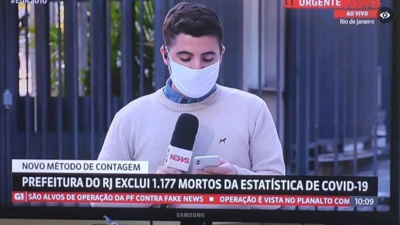

'--------------------------------------------------'

'Rank: 1 Val: 0.14405082166194916'

'102730_eng'

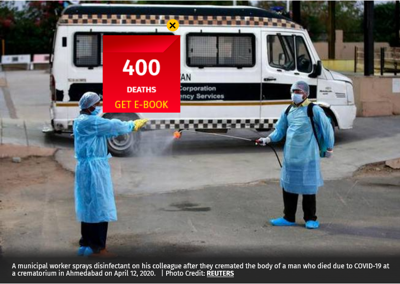

'--------------------------------------------------'

'Rank: 2 Val: 0.1135006919503212'

'102141_2_eng'

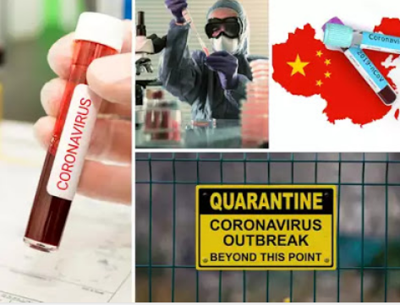

'--------------------------------------------------'

In [19]:
my_obj.show_results(
    search_query3[0],
)

## Improve the search results

For even better results, a slightly different approach has been prepared that can improve search results. It is quite resource-intensive, so it is applied after the main algorithm has found the most relevant images. This approach works only with text queries. Among the parameters you can choose 3 models: `"blip_base"`, `"blip_large"`, `"blip2_coco"`. If you get an `Out of Memory` error, try reducing the batch_size value (minimum = 1), which is the number of images being processed simultaneously. With the parameter `need_grad_cam = True/False` you can enable the calculation of the heat map of each image to be processed. Thus the `image_text_match_reordering` function calculates new similarity values and new ranks for each image. The resulting values are added to the general dictionary.

In [20]:
itm_model = "blip_base"
# itm_model = "blip_large"
# itm_model = "blip2_coco"

In [21]:
itm_scores, image_gradcam_with_itm = my_obj.image_text_match_reordering(
    search_query3,
    itm_model,
    image_keys,
    sorted_lists,
    batch_size=1,
    need_grad_cam=True,
)

  0%|          | 0.00/1.78G [00:00<?, ?B/s]

  0%|          | 4.01M/1.78G [00:00<00:52, 36.3MB/s]

  0%|          | 8.01M/1.78G [00:00<00:59, 32.1MB/s]

  1%|          | 15.3M/1.78G [00:00<00:38, 49.6MB/s]

  1%|          | 20.4M/1.78G [00:00<00:38, 48.8MB/s]

  1%|▏         | 26.4M/1.78G [00:00<00:35, 53.5MB/s]

  2%|▏         | 32.0M/1.78G [00:00<00:34, 55.1MB/s]

  2%|▏         | 39.7M/1.78G [00:00<00:29, 63.2MB/s]

  3%|▎         | 45.9M/1.78G [00:00<00:34, 54.3MB/s]

  3%|▎         | 51.3M/1.78G [00:01<00:35, 52.1MB/s]

  3%|▎         | 56.5M/1.78G [00:01<00:40, 45.3MB/s]

  4%|▎         | 64.0M/1.78G [00:01<00:37, 49.7MB/s]

  4%|▍         | 72.0M/1.78G [00:01<00:38, 47.4MB/s]

  4%|▍         | 78.2M/1.78G [00:01<00:35, 51.2MB/s]

  5%|▍         | 83.3M/1.78G [00:01<00:36, 50.1MB/s]

  5%|▍         | 88.2M/1.78G [00:01<00:46, 39.2MB/s]

  5%|▌         | 95.2M/1.78G [00:02<00:38, 46.6MB/s]

  6%|▌         | 100M/1.78G [00:02<00:37, 47.8MB/s] 

  6%|▌         | 108M/1.78G [00:02<00:31, 56.7MB/s]

  6%|▋         | 117M/1.78G [00:02<00:27, 64.9MB/s]

  7%|▋         | 123M/1.78G [00:02<00:27, 63.6MB/s]

  7%|▋         | 132M/1.78G [00:02<00:25, 70.2MB/s]

  8%|▊         | 138M/1.78G [00:02<00:30, 58.1MB/s]

  8%|▊         | 145M/1.78G [00:02<00:28, 60.6MB/s]

  8%|▊         | 152M/1.78G [00:02<00:27, 63.6MB/s]

  9%|▊         | 159M/1.78G [00:03<00:26, 65.6MB/s]

  9%|▉         | 165M/1.78G [00:03<00:26, 66.6MB/s]

  9%|▉         | 172M/1.78G [00:03<00:26, 65.5MB/s]

 10%|▉         | 181M/1.78G [00:03<00:23, 72.8MB/s]

 10%|█         | 188M/1.78G [00:03<00:22, 75.2MB/s]

 11%|█         | 196M/1.78G [00:03<00:22, 75.1MB/s]

 11%|█         | 203M/1.78G [00:03<00:24, 69.9MB/s]

 12%|█▏        | 210M/1.78G [00:03<00:25, 67.5MB/s]

 12%|█▏        | 216M/1.78G [00:03<00:25, 67.0MB/s]

 12%|█▏        | 224M/1.78G [00:04<00:23, 70.6MB/s]

 13%|█▎        | 232M/1.78G [00:04<00:24, 67.0MB/s]

 13%|█▎        | 239M/1.78G [00:04<00:24, 68.9MB/s]

 14%|█▎        | 246M/1.78G [00:04<00:23, 70.7MB/s]

 14%|█▍        | 253M/1.78G [00:04<00:23, 70.4MB/s]

 14%|█▍        | 260M/1.78G [00:04<00:22, 71.4MB/s]

 15%|█▍        | 267M/1.78G [00:04<00:23, 68.5MB/s]

 15%|█▌        | 274M/1.78G [00:04<00:23, 68.9MB/s]

 15%|█▌        | 280M/1.78G [00:04<00:26, 62.0MB/s]

 16%|█▌        | 288M/1.78G [00:05<00:24, 66.7MB/s]

 16%|█▌        | 295M/1.78G [00:05<00:23, 67.1MB/s]

 17%|█▋        | 301M/1.78G [00:05<00:33, 47.0MB/s]

 17%|█▋        | 306M/1.78G [00:05<00:46, 34.3MB/s]

 17%|█▋        | 312M/1.78G [00:05<00:49, 31.7MB/s]

 18%|█▊        | 320M/1.78G [00:06<00:54, 28.6MB/s]

 18%|█▊        | 327M/1.78G [00:06<00:43, 36.0MB/s]

 18%|█▊        | 332M/1.78G [00:06<00:43, 35.8MB/s]

 19%|█▊        | 339M/1.78G [00:06<00:36, 42.7MB/s]

 19%|█▉        | 345M/1.78G [00:06<00:32, 48.3MB/s]

 19%|█▉        | 355M/1.78G [00:06<00:25, 60.1MB/s]

 20%|█▉        | 362M/1.78G [00:06<00:26, 58.5MB/s]

 20%|██        | 370M/1.78G [00:06<00:23, 65.9MB/s]

 21%|██        | 377M/1.78G [00:07<00:22, 67.0MB/s]

 21%|██        | 385M/1.78G [00:07<00:20, 73.2MB/s]

 22%|██▏       | 393M/1.78G [00:07<00:28, 52.8MB/s]

 22%|██▏       | 400M/1.78G [00:07<00:33, 44.4MB/s]

 22%|██▏       | 408M/1.78G [00:07<00:29, 50.9MB/s]

 23%|██▎       | 416M/1.78G [00:07<00:26, 54.6MB/s]

 23%|██▎       | 424M/1.78G [00:08<00:26, 56.3MB/s]

 24%|██▎       | 432M/1.78G [00:08<00:32, 44.3MB/s]

 24%|██▍       | 438M/1.78G [00:08<00:29, 48.4MB/s]

 24%|██▍       | 444M/1.78G [00:08<00:32, 44.1MB/s]

 25%|██▍       | 448M/1.78G [00:08<00:38, 37.4MB/s]

 25%|██▌       | 456M/1.78G [00:08<00:31, 45.3MB/s]

 26%|██▌       | 465M/1.78G [00:09<00:24, 57.1MB/s]

 26%|██▌       | 473M/1.78G [00:09<00:22, 62.3MB/s]

 26%|██▋       | 481M/1.78G [00:09<00:20, 68.3MB/s]

 27%|██▋       | 489M/1.78G [00:09<00:19, 72.2MB/s]

 27%|██▋       | 497M/1.78G [00:09<00:18, 75.7MB/s]

 28%|██▊       | 505M/1.78G [00:09<00:17, 77.7MB/s]

 28%|██▊       | 514M/1.78G [00:09<00:16, 81.6MB/s]

 29%|██▊       | 522M/1.78G [00:09<00:17, 78.6MB/s]

 29%|██▉       | 529M/1.78G [00:09<00:17, 78.3MB/s]

 30%|██▉       | 537M/1.78G [00:09<00:17, 76.8MB/s]

 30%|██▉       | 545M/1.78G [00:10<00:17, 77.2MB/s]

 30%|███       | 552M/1.78G [00:10<00:19, 67.0MB/s]

 31%|███       | 559M/1.78G [00:10<00:18, 69.8MB/s]

 31%|███       | 566M/1.78G [00:10<00:19, 66.5MB/s]

 31%|███▏      | 573M/1.78G [00:10<00:20, 65.4MB/s]

 32%|███▏      | 579M/1.78G [00:10<00:20, 64.5MB/s]

 32%|███▏      | 586M/1.78G [00:10<00:19, 65.5MB/s]

 33%|███▎      | 595M/1.78G [00:10<00:17, 75.0MB/s]

 33%|███▎      | 603M/1.78G [00:10<00:16, 76.8MB/s]

 34%|███▎      | 612M/1.78G [00:11<00:15, 81.2MB/s]

 34%|███▍      | 619M/1.78G [00:11<00:22, 55.2MB/s]

 34%|███▍      | 626M/1.78G [00:11<00:35, 35.7MB/s]

 35%|███▍      | 632M/1.78G [00:11<00:30, 41.1MB/s]

 35%|███▌      | 640M/1.78G [00:11<00:26, 46.8MB/s]

 36%|███▌      | 647M/1.78G [00:11<00:23, 51.9MB/s]

 36%|███▌      | 653M/1.78G [00:12<00:24, 49.7MB/s]

 36%|███▌      | 658M/1.78G [00:12<00:23, 51.5MB/s]

 36%|███▋      | 664M/1.78G [00:12<00:22, 53.3MB/s]

 37%|███▋      | 670M/1.78G [00:12<00:21, 55.3MB/s]

 37%|███▋      | 677M/1.78G [00:12<00:19, 60.9MB/s]

 38%|███▊      | 683M/1.78G [00:12<00:20, 57.3MB/s]

 38%|███▊      | 689M/1.78G [00:12<00:20, 56.7MB/s]

 38%|███▊      | 695M/1.78G [00:12<00:20, 58.3MB/s]

 39%|███▊      | 701M/1.78G [00:12<00:19, 61.0MB/s]

 39%|███▉      | 707M/1.78G [00:13<00:20, 56.9MB/s]

 39%|███▉      | 713M/1.78G [00:13<00:20, 55.9MB/s]

 40%|███▉      | 720M/1.78G [00:13<00:19, 59.5MB/s]

 40%|███▉      | 726M/1.78G [00:13<00:18, 62.8MB/s]

 40%|████      | 732M/1.78G [00:13<00:21, 52.5MB/s]

 41%|████      | 740M/1.78G [00:13<00:19, 57.9MB/s]

 41%|████      | 745M/1.78G [00:13<00:19, 57.0MB/s]

 41%|████▏     | 753M/1.78G [00:13<00:18, 62.1MB/s]

 42%|████▏     | 760M/1.78G [00:13<00:16, 66.6MB/s]

 42%|████▏     | 767M/1.78G [00:14<00:16, 66.7MB/s]

 43%|████▎     | 775M/1.78G [00:14<00:14, 73.8MB/s]

 43%|████▎     | 783M/1.78G [00:14<00:18, 58.4MB/s]

 43%|████▎     | 790M/1.78G [00:14<00:17, 61.9MB/s]

 44%|████▍     | 798M/1.78G [00:14<00:15, 68.3MB/s]

 44%|████▍     | 806M/1.78G [00:14<00:14, 72.8MB/s]

 45%|████▍     | 813M/1.78G [00:14<00:15, 67.9MB/s]

 45%|████▌     | 820M/1.78G [00:14<00:16, 62.9MB/s]

 45%|████▌     | 826M/1.78G [00:15<00:16, 62.5MB/s]

 46%|████▌     | 832M/1.78G [00:15<00:17, 59.5MB/s]

 46%|████▌     | 840M/1.78G [00:15<00:16, 63.5MB/s]

 46%|████▋     | 846M/1.78G [00:15<00:16, 60.5MB/s]

 47%|████▋     | 852M/1.78G [00:15<00:16, 62.8MB/s]

 47%|████▋     | 859M/1.78G [00:15<00:15, 63.4MB/s]

 48%|████▊     | 865M/1.78G [00:15<00:17, 58.0MB/s]

 48%|████▊     | 871M/1.78G [00:15<00:16, 59.7MB/s]

 48%|████▊     | 880M/1.78G [00:15<00:14, 68.7MB/s]

 49%|████▉     | 889M/1.78G [00:16<00:12, 76.4MB/s]

 49%|████▉     | 897M/1.78G [00:16<00:12, 78.5MB/s]

 50%|████▉     | 904M/1.78G [00:16<00:14, 68.2MB/s]

 50%|█████     | 912M/1.78G [00:16<00:14, 67.2MB/s]

 51%|█████     | 920M/1.78G [00:16<00:13, 70.2MB/s]

 51%|█████     | 926M/1.78G [00:16<00:14, 65.3MB/s]

 51%|█████▏    | 933M/1.78G [00:16<00:14, 66.1MB/s]

 52%|█████▏    | 939M/1.78G [00:16<00:16, 57.4MB/s]

 52%|█████▏    | 945M/1.78G [00:17<00:16, 56.7MB/s]

 52%|█████▏    | 952M/1.78G [00:17<00:14, 60.9MB/s]

 53%|█████▎    | 960M/1.78G [00:17<00:13, 65.7MB/s]

 53%|█████▎    | 966M/1.78G [00:17<00:14, 60.5MB/s]

 53%|█████▎    | 972M/1.78G [00:17<00:14, 60.4MB/s]

 54%|█████▎    | 978M/1.78G [00:17<00:15, 57.8MB/s]

 54%|█████▍    | 984M/1.78G [00:17<00:14, 58.7MB/s]

 54%|█████▍    | 992M/1.78G [00:17<00:14, 58.9MB/s]

 55%|█████▍    | 998M/1.78G [00:17<00:15, 56.7MB/s]

 55%|█████▌    | 0.98G/1.78G [00:18<00:16, 53.5MB/s]

 55%|█████▌    | 0.98G/1.78G [00:18<00:16, 52.2MB/s]

 56%|█████▌    | 0.99G/1.78G [00:18<00:16, 51.3MB/s]

 56%|█████▌    | 1.00G/1.78G [00:18<00:14, 58.2MB/s]

 57%|█████▋    | 1.01G/1.78G [00:18<00:15, 52.9MB/s]

 57%|█████▋    | 1.01G/1.78G [00:18<00:14, 55.8MB/s]

 57%|█████▋    | 1.02G/1.78G [00:18<00:13, 61.8MB/s]

 58%|█████▊    | 1.03G/1.78G [00:18<00:12, 64.8MB/s]

 58%|█████▊    | 1.03G/1.78G [00:18<00:11, 70.1MB/s]

 59%|█████▊    | 1.04G/1.78G [00:19<00:11, 67.7MB/s]

 59%|█████▉    | 1.05G/1.78G [00:19<00:10, 73.3MB/s]

 59%|█████▉    | 1.06G/1.78G [00:19<00:09, 78.8MB/s]

 60%|█████▉    | 1.06G/1.78G [00:19<00:09, 79.0MB/s]

 60%|██████    | 1.07G/1.78G [00:19<00:09, 76.5MB/s]

 61%|██████    | 1.08G/1.78G [00:19<00:09, 77.3MB/s]

 61%|██████    | 1.09G/1.78G [00:19<00:10, 73.3MB/s]

 62%|██████▏   | 1.10G/1.78G [00:19<00:09, 79.5MB/s]

 62%|██████▏   | 1.10G/1.78G [00:19<00:10, 70.7MB/s]

 62%|██████▏   | 1.11G/1.78G [00:20<00:09, 72.2MB/s]

 63%|██████▎   | 1.12G/1.78G [00:20<00:09, 74.7MB/s]

 63%|██████▎   | 1.12G/1.78G [00:20<00:09, 74.0MB/s]

 64%|██████▎   | 1.13G/1.78G [00:20<00:09, 72.1MB/s]

 64%|██████▍   | 1.14G/1.78G [00:20<00:09, 75.8MB/s]

 65%|██████▍   | 1.15G/1.78G [00:20<00:08, 76.0MB/s]

 65%|██████▌   | 1.16G/1.78G [00:20<00:08, 77.3MB/s]

 65%|██████▌   | 1.16G/1.78G [00:20<00:08, 76.2MB/s]

 66%|██████▌   | 1.17G/1.78G [00:20<00:08, 74.3MB/s]

 66%|██████▌   | 1.18G/1.78G [00:21<00:08, 75.6MB/s]

 67%|██████▋   | 1.19G/1.78G [00:21<00:08, 78.6MB/s]

 67%|██████▋   | 1.19G/1.78G [00:21<00:08, 78.3MB/s]

 67%|██████▋   | 1.20G/1.78G [00:21<00:08, 70.8MB/s]

 68%|██████▊   | 1.21G/1.78G [00:21<00:09, 63.7MB/s]

 68%|██████▊   | 1.21G/1.78G [00:21<00:09, 67.0MB/s]

 69%|██████▊   | 1.22G/1.78G [00:21<00:09, 66.3MB/s]

 69%|██████▉   | 1.23G/1.78G [00:21<00:07, 75.2MB/s]

 70%|██████▉   | 1.24G/1.78G [00:21<00:07, 77.6MB/s]

 70%|███████   | 1.24G/1.78G [00:22<00:08, 66.8MB/s]

 70%|███████   | 1.25G/1.78G [00:22<00:07, 72.5MB/s]

 71%|███████   | 1.26G/1.78G [00:22<00:08, 68.6MB/s]

 71%|███████▏  | 1.27G/1.78G [00:22<00:07, 72.2MB/s]

 72%|███████▏  | 1.27G/1.78G [00:22<00:07, 72.5MB/s]

 72%|███████▏  | 1.28G/1.78G [00:22<00:07, 73.7MB/s]

 73%|███████▎  | 1.29G/1.78G [00:22<00:06, 80.8MB/s]

 73%|███████▎  | 1.30G/1.78G [00:22<00:06, 83.6MB/s]

 74%|███████▎  | 1.31G/1.78G [00:22<00:06, 83.1MB/s]

 74%|███████▍  | 1.32G/1.78G [00:23<00:05, 84.6MB/s]

 74%|███████▍  | 1.32G/1.78G [00:23<00:05, 83.9MB/s]

 75%|███████▍  | 1.33G/1.78G [00:23<00:05, 86.7MB/s]

 75%|███████▌  | 1.34G/1.78G [00:23<00:06, 77.2MB/s]

 76%|███████▌  | 1.35G/1.78G [00:23<00:05, 79.3MB/s]

 76%|███████▋  | 1.36G/1.78G [00:23<00:06, 72.9MB/s]

 77%|███████▋  | 1.36G/1.78G [00:23<00:06, 73.3MB/s]

 77%|███████▋  | 1.37G/1.78G [00:23<00:06, 64.1MB/s]

 77%|███████▋  | 1.38G/1.78G [00:24<00:09, 47.3MB/s]

 78%|███████▊  | 1.38G/1.78G [00:24<00:07, 53.0MB/s]

 78%|███████▊  | 1.39G/1.78G [00:24<00:06, 60.5MB/s]

 79%|███████▊  | 1.40G/1.78G [00:24<00:06, 66.3MB/s]

 79%|███████▉  | 1.41G/1.78G [00:24<00:06, 65.1MB/s]

 80%|███████▉  | 1.42G/1.78G [00:24<00:05, 74.5MB/s]

 80%|████████  | 1.42G/1.78G [00:24<00:04, 77.1MB/s]

 81%|████████  | 1.43G/1.78G [00:24<00:04, 80.8MB/s]

 81%|████████  | 1.44G/1.78G [00:24<00:04, 84.1MB/s]

 81%|████████▏ | 1.45G/1.78G [00:25<00:04, 84.4MB/s]

 82%|████████▏ | 1.46G/1.78G [00:25<00:04, 84.0MB/s]

 82%|████████▏ | 1.46G/1.78G [00:25<00:04, 76.2MB/s]

 83%|████████▎ | 1.47G/1.78G [00:25<00:04, 76.1MB/s]

 83%|████████▎ | 1.48G/1.78G [00:25<00:03, 80.3MB/s]

 84%|████████▎ | 1.49G/1.78G [00:25<00:03, 80.5MB/s]

 84%|████████▍ | 1.49G/1.78G [00:25<00:03, 80.0MB/s]

 85%|████████▍ | 1.50G/1.78G [00:25<00:03, 81.1MB/s]

 85%|████████▍ | 1.51G/1.78G [00:25<00:03, 74.1MB/s]

 85%|████████▌ | 1.52G/1.78G [00:26<00:04, 68.8MB/s]

 86%|████████▌ | 1.53G/1.78G [00:26<00:03, 72.6MB/s]

 86%|████████▌ | 1.53G/1.78G [00:26<00:03, 73.9MB/s]

 87%|████████▋ | 1.54G/1.78G [00:26<00:03, 71.1MB/s]

 87%|████████▋ | 1.55G/1.78G [00:26<00:03, 69.7MB/s]

 87%|████████▋ | 1.55G/1.78G [00:26<00:03, 71.7MB/s]

 88%|████████▊ | 1.56G/1.78G [00:26<00:03, 67.9MB/s]

 88%|████████▊ | 1.57G/1.78G [00:26<00:03, 60.8MB/s]

 88%|████████▊ | 1.57G/1.78G [00:26<00:03, 60.5MB/s]

 89%|████████▉ | 1.58G/1.78G [00:27<00:03, 66.9MB/s]

 89%|████████▉ | 1.59G/1.78G [00:27<00:02, 68.5MB/s]

 90%|████████▉ | 1.59G/1.78G [00:27<00:02, 70.4MB/s]

 90%|█████████ | 1.60G/1.78G [00:27<00:02, 67.9MB/s]

 91%|█████████ | 1.61G/1.78G [00:27<00:02, 71.3MB/s]

 91%|█████████ | 1.62G/1.78G [00:27<00:02, 73.9MB/s]

 91%|█████████▏| 1.62G/1.78G [00:27<00:02, 71.1MB/s]

 92%|█████████▏| 1.63G/1.78G [00:27<00:02, 73.6MB/s]

 92%|█████████▏| 1.64G/1.78G [00:27<00:01, 77.3MB/s]

 93%|█████████▎| 1.65G/1.78G [00:27<00:01, 74.0MB/s]

 93%|█████████▎| 1.65G/1.78G [00:28<00:01, 76.4MB/s]

 93%|█████████▎| 1.66G/1.78G [00:28<00:01, 78.3MB/s]

 94%|█████████▍| 1.67G/1.78G [00:28<00:01, 72.7MB/s]

 94%|█████████▍| 1.68G/1.78G [00:28<00:01, 73.4MB/s]

 95%|█████████▍| 1.68G/1.78G [00:28<00:01, 77.1MB/s]

 95%|█████████▌| 1.69G/1.78G [00:28<00:01, 75.9MB/s]

 96%|█████████▌| 1.70G/1.78G [00:28<00:01, 68.4MB/s]

 96%|█████████▌| 1.71G/1.78G [00:28<00:01, 72.3MB/s]

 96%|█████████▋| 1.71G/1.78G [00:28<00:00, 74.1MB/s]

 97%|█████████▋| 1.72G/1.78G [00:29<00:00, 72.7MB/s]

 97%|█████████▋| 1.73G/1.78G [00:29<00:00, 63.3MB/s]

 98%|█████████▊| 1.73G/1.78G [00:29<00:00, 63.1MB/s]

 98%|█████████▊| 1.74G/1.78G [00:29<00:00, 63.7MB/s]

 98%|█████████▊| 1.75G/1.78G [00:29<00:00, 58.6MB/s]

 99%|█████████▊| 1.75G/1.78G [00:29<00:00, 57.2MB/s]

 99%|█████████▉| 1.76G/1.78G [00:29<00:00, 64.2MB/s]

 99%|█████████▉| 1.77G/1.78G [00:29<00:00, 69.4MB/s]

100%|█████████▉| 1.78G/1.78G [00:29<00:00, 73.1MB/s]

100%|██████████| 1.78G/1.78G [00:29<00:00, 63.6MB/s]

Then using the same output function you can add the `ITM=True` arguments to output the new image order. You can also add the `image_gradcam_with_itm` argument to output the heat maps of the calculated images. 

'Your search query: politician press conference'

'--------------------------------------------------'

'Results:'

'Rank: 0 Val: 0.058296382427215576'

'106349S_por'

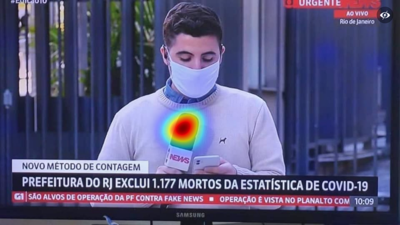

'--------------------------------------------------'

'Rank: 1 Val: 0.0018555393908172846'

'102730_eng'

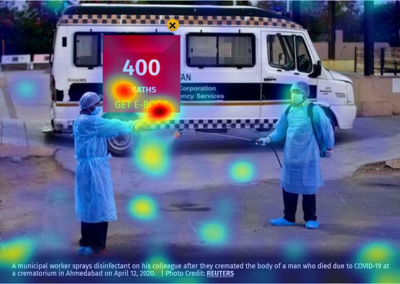

'--------------------------------------------------'

'Rank: 2 Val: 0.0012622162466868758'

'102141_2_eng'

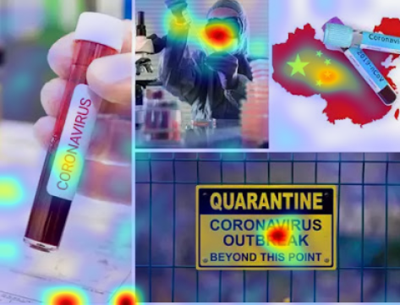

'--------------------------------------------------'

In [22]:
my_obj.show_results(
    search_query3[0], itm=True, image_gradcam_with_itm=image_gradcam_with_itm
)

## Save search results to csv

Convert the dictionary of dictionarys into a dictionary with lists:

In [23]:
outdict = mutils.append_data_to_dict(mydict)
df = mutils.dump_df(outdict)

Check the dataframe:

In [24]:
df.head(10)

filename  rank politician press conference  \
0    data/102730_eng.png                                 1   
1  data/102141_2_eng.png                                 2   
2   data/106349S_por.png                                 0   

   politician press conference  rank a world map  a world map  rank a dog  \
0                     0.144051                 0     0.131088           1   
1                     0.113501                 1     0.106334           2   
2                     0.166554                 2     0.093529           0   

      a dog  itm politician press conference  \
0  0.100833                         0.001856   
1  0.049040                         0.001262   
2  0.108630                         0.058296   

   itm_rank politician press conference  itm a world map  \
0                                     1         0.004548   
1                                     2         0.085762   
2                                     0         0.000794   

   itm_rank a world map  itm a dog  itm_rank a dog  
0                     1   0.000812               0  
1                     0   0.000175               1  
2                     2   0.000091               2

Write the csv file:

In [25]:
df.to_csv("data/data_out.csv")